In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/diego/Desktop/virtualenvs/data_science/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pd.read_csv('insurance.csv')
df['has_children'] = (df['children'] != 0)
df.head()

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [3]:
pd.DataFrame(df.groupby('age')['charges'].mean()).head()
pd.DataFrame(df.groupby('age')['charges'].std()).head()

,charges
age,
18,10198.459989
19,12469.537468
20,12049.624794
21,6168.059334
22,14653.363670


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [5]:
df.loc[df['bmi'] < 17, 'bmi'] = 0
df.loc[(df['bmi'] >= 17.0) & (df['bmi'] <= 18.49) , 'bmi'] = 1
df.loc[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.99) , 'bmi'] = 2
df.loc[(df['bmi'] >= 25.0) & (df['bmi'] <= 29.99) , 'bmi'] = 3
df.loc[(df['bmi'] >= 30.0) & (df['bmi'] <= 34.99) , 'bmi'] = 4
df.loc[(df['bmi'] >= 35.0) & (df['bmi'] <= 39.995) , 'bmi'] = 5
df.loc[df['bmi'] >= 40, 'bmi'] = 6
df.head()
# Abaixo de 17 	Muito abaixo do peso
# Entre 17 e 18,49 	Abaixo do peso
# Entre 18,5 e 24,99 	Peso normal
# Entre 25 e 29,99 	Acima do peso
# Entre 30 e 34,99 	Obesidade I
# Entre 35 e 39,99 	Obesidade II (severa)
# Acima de 40 	Obesidade III (mórbida)

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,3.0,0,yes,southwest,16884.92400,False
1,18,male,4.0,1,no,southeast,1725.55230,True
2,28,male,4.0,3,no,southeast,4449.46200,True
3,33,male,2.0,0,no,northwest,21984.47061,False
4,32,male,3.0,0,no,northwest,3866.85520,False


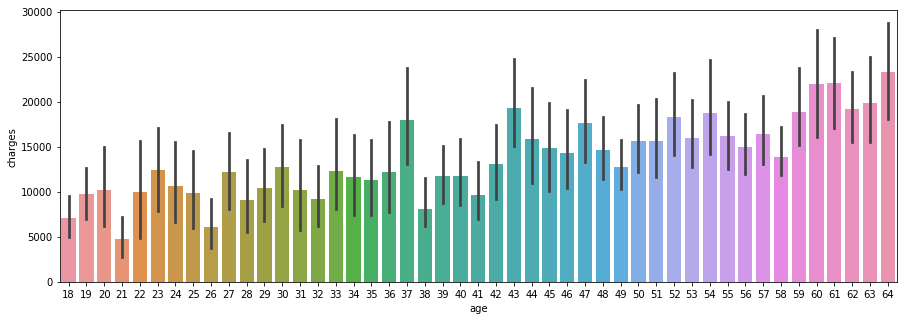

In [6]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['age'], y=df['charges']);

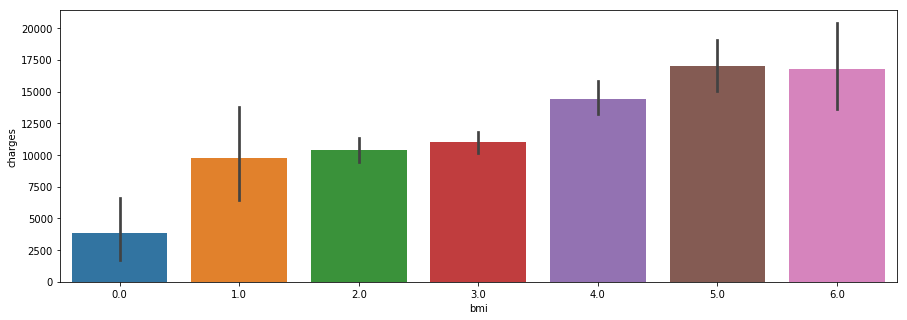

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['bmi'], y=df['charges']);

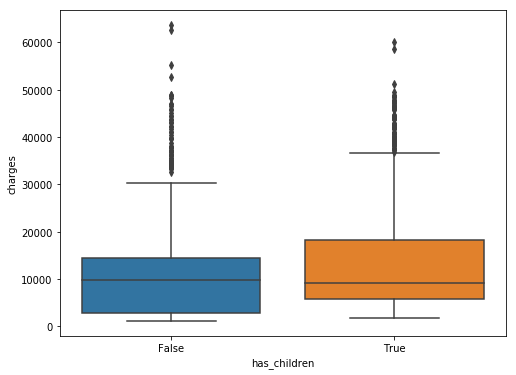

In [8]:
#box plot overallqual/saleprice
var = 'has_children'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

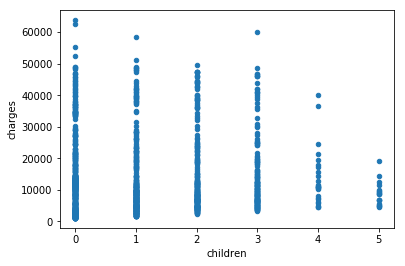

In [49]:
var = 'children'
data = pd.concat([df['charges'], df[var]], axis=1)
data.plot.scatter(x=var, y='charges');

#It seems that the number of children doesn't influence anything

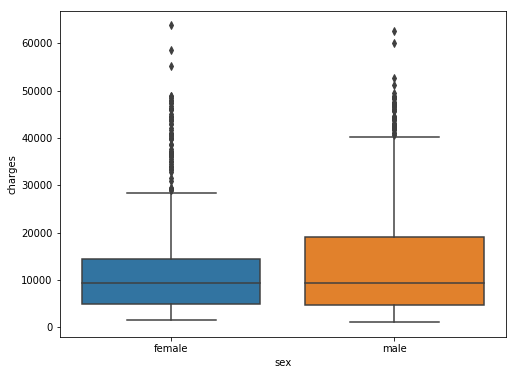

In [47]:
#box plot overallqual/saleprice
var = 'sex'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

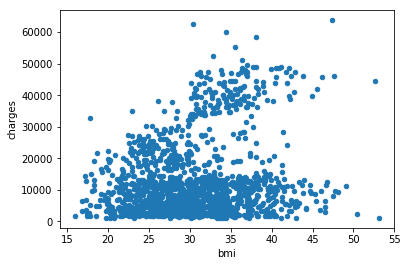

In [38]:
var = 'bmi'
data = pd.concat([df['charges'], df[var]], axis=1)
data.plot.scatter(x=var, y='charges');

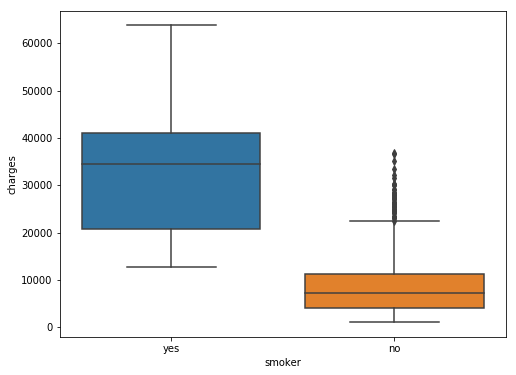

In [36]:
#box plot overallqual/saleprice
var = 'smoker'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

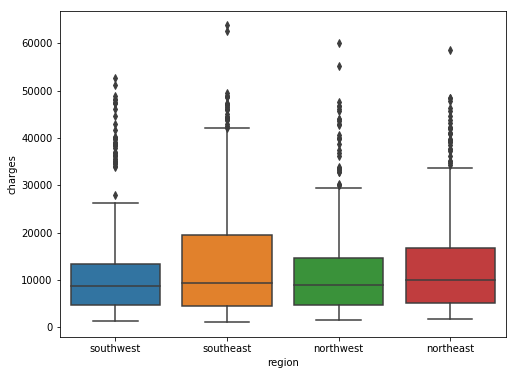

In [37]:
#box plot overallqual/saleprice
var = 'region'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

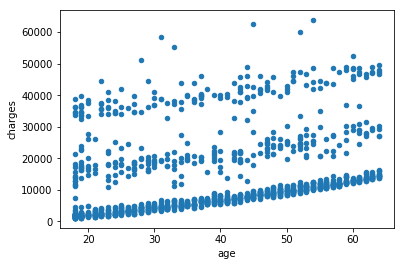

In [35]:
#scatter plot grlivarea/saleprice
var = 'age'
data = pd.concat([df['charges'], df[var]], axis=1)
data.plot.scatter(x=var, y='charges');

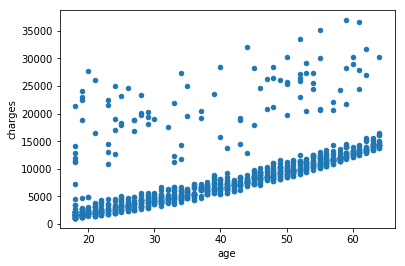

In [45]:
data = df[df['smoker'] == 'no']
var = 'age'
data = pd.concat([data['charges'], data[var]], axis=1)
data.plot.scatter(x=var, y='charges');

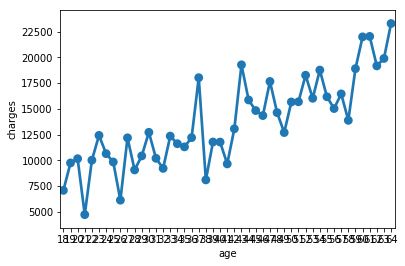

In [20]:
#scatter plot grlivarea/saleprice
var = 'charges'
data = pd.DataFrame(df.groupby('age')['charges'].mean()).reset_index()
#data.plot.scatter(x='age', y='charges')

sns.pointplot(x='age', y='charges',
                      data=data)

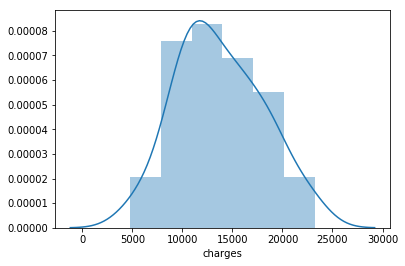

In [24]:
sns.distplot(data['charges']);